In [1]:
import idx2numpy
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

### mnist dataset http://yann.lecun.com/exdb/mnist/

!wget https://github.com/ihpar/ibu_cv/raw/main/mnist/m_nist.zip

!unzip /content/m_nist.zip -d m_nist


In [2]:
MNIST_DIR = "mnist/"

In [3]:
X = idx2numpy.convert_from_file(MNIST_DIR + "train-images-idx3-ubyte")
y = idx2numpy.convert_from_file(MNIST_DIR + "train-labels-idx1-ubyte")
print(X.shape, y.shape)
print(np.min(X), np.max(X))

(60000, 28, 28) (60000,)
0 255


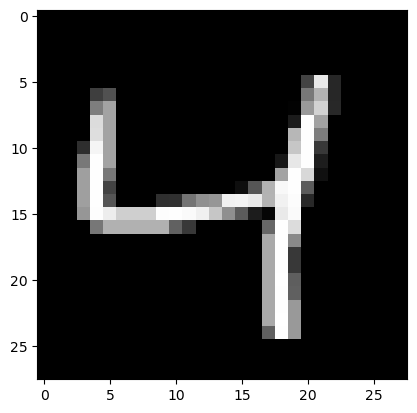

In [4]:
plt.imshow(X[2], cmap="gray")
plt.show()

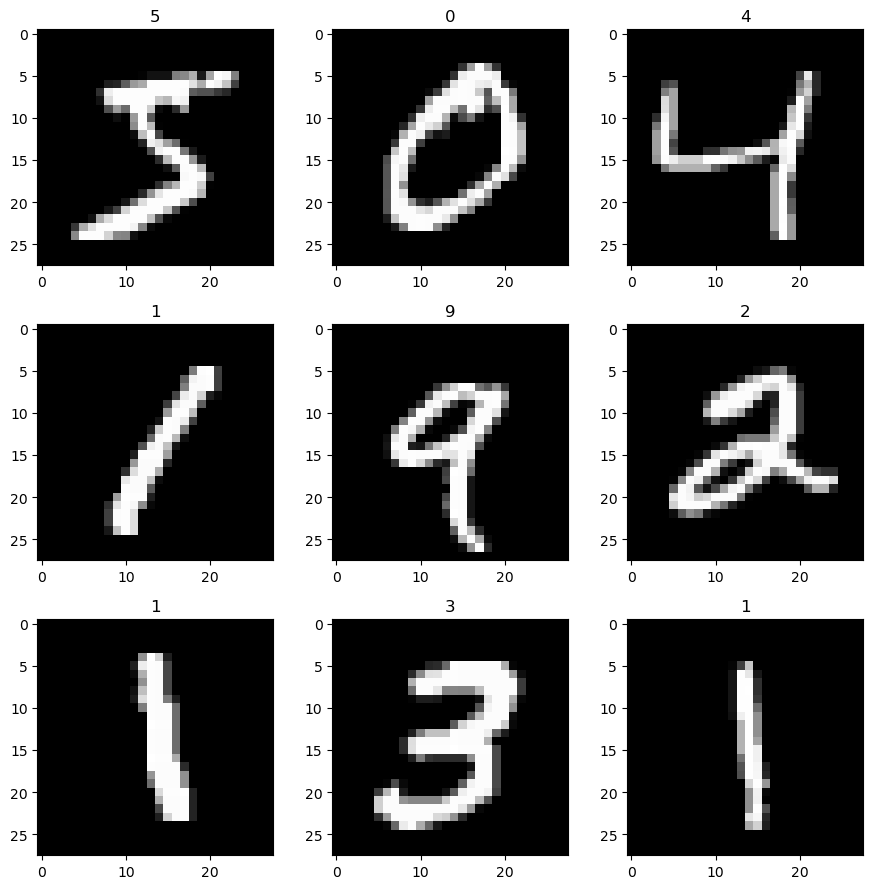

In [5]:
plt.figure(figsize=(9, 9))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(str(y[i]))
    plt.imshow(X[i], cmap="gray")

plt.tight_layout()
plt.show()

In [6]:
a = np.array([[1, 3, 2],
              [1, 1, 2]])

b = np.array([[4, 1, 3],
              [2, 1, 2]])
print(a - b)

[[-3  2 -1]
 [-1  0  0]]


In [7]:
np.sum(np.abs(a - b))

7

In [8]:
def l1_distance(img_a, img_b):
    fark = img_a - img_b
    mutlak = np.abs(fark)
    toplam_fark = np.sum(mutlak)
    return toplam_fark


def l2_distance(img_a, img_b):
    fark = img_a - img_b
    karesi = fark ** 2
    toplam = np.sum(karesi)
    karekok = np.sqrt(toplam)
    return karekok


a = np.array([[1, 1],
              [1, 1]])

b = np.array([[2, 2],
              [2, 2]])

dist = l1_distance(a, b)
print(dist)
dist = l2_distance(a, b)
print(dist)

4
2.0


In [9]:
c = Counter([2, 1, 2, 2, 1, 3])
c.most_common()[0][0]

2

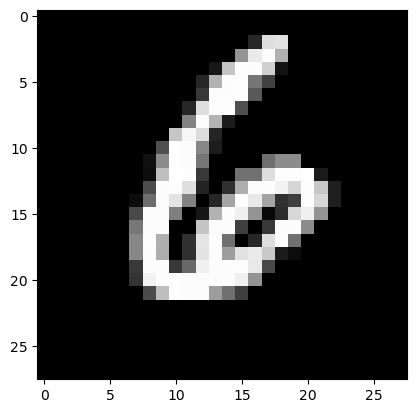

6


In [10]:
resim_idx = 13
query_img = X[resim_idx]
plt.imshow(query_img, cmap="gray")
plt.show()
print(y[resim_idx])

In [11]:
uzakliklar = []
for img in X:
    uzaklik = l1_distance(img, query_img)
    uzakliklar.append(uzaklik)

print(uzakliklar[:10])

[29034, 31068, 27608, 25556, 26515, 29830, 22483, 36096, 19551, 26997]


In [12]:
np.argsort([3, 1, -1, 7, 2])

array([2, 1, 4, 0, 3])

In [13]:
sirali_indeksler = np.argsort(uzakliklar)
en_yakin_komsular = sirali_indeksler[1:4]

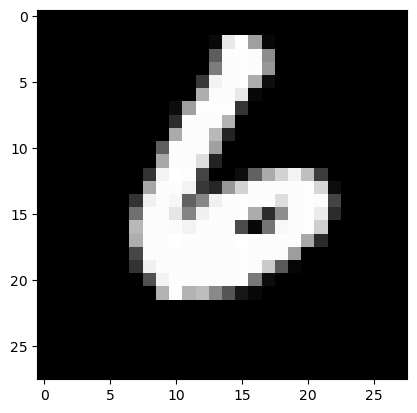

6


In [14]:
resim_idx = 13
plt.imshow(X[en_yakin_komsular[2]], cmap="gray")
plt.show()
print(y[en_yakin_komsular[2]])

In [15]:
komsu_siniflari = []
for komsu in en_yakin_komsular:
    komsu_siniflari.append(y[komsu])

In [16]:
komsu_siniflari

[6, 1, 6]

In [17]:
Counter(komsu_siniflari).most_common()[0][0]

6

In [18]:
class KNN:
    def __init__(self, distance_fun, K):
        self.distance_fun = distance_fun
        self.K = K

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, query_img):
        uzakliklar = []
        for img in self.X:
            uzaklik = self.distance_fun(img, query_img)
            uzakliklar.append(uzaklik)
        sirali_indeksler = np.argsort(uzakliklar)
        en_yakin_komsular = sirali_indeksler[1:self.K+1]
        komsu_siniflari = []
        for komsu in en_yakin_komsular:
            komsu_siniflari.append(y[komsu])

        return Counter(komsu_siniflari).most_common()[0][0]

6


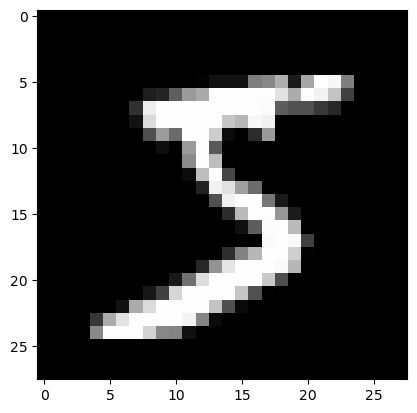

In [19]:
resim_idx = 0
knn = KNN(l2_distance, 7)
knn.fit(X, y)
query_img = X[resim_idx]
sonuc = knn.predict(query_img)
print(sonuc)
plt.imshow(X[resim_idx], cmap="gray")
plt.show()